<center><h1>Inteligencia Artificial</header1></center>

Presentado por: Luis Olalla  <br>
Fecha: 27/0/22

# Importación de librerias necesarias

In [37]:
#Para esta actividad se importarán las siguientes librerías:
#libreria pandas
import pandas as pd
# import the necessary models
from sklearn import datasets
#importar libreria de entrenamiento
from sklearn.model_selection import train_test_split
#importar liberia svm
from sklearn import svm
#importar liberia de metricas
from sklearn import metrics

## Cargar el Dataset

In [38]:
#Cargamos el dataset
estres=pd.read_csv('estres.csv')


In [39]:
#crear dataframe
df =pd.DataFrame(estres)

In [40]:
# primeros 10 registros del dataset
df.head(10)

,Humidity,Temperature,Step count,Stress Level
0,21.33,90.33,123,1
1,21.41,90.41,93,1
2,27.12,96.12,196,2
3,27.64,96.64,177,2
4,10.87,79.87,87,0
5,11.31,80.31,40,0
6,18.16,87.16,88,1
7,28.20,97.20,162,2
8,14.25,83.25,61,0
9,26.13,95.13,168,2


## Descripción de la fuente del Dataset

In [41]:
#Descripcion de datos del dataset 
print(estres.describe())

          Humidity  Temperature   Step count  Stress Level
count  2001.000000  2001.000000  2001.000000   2001.000000
mean     20.000000    89.000000   100.141429      1.104448
std       5.777833     5.777833    58.182948      0.771094
min      10.000000    79.000000     0.000000      0.000000
25%      15.000000    84.000000    50.000000      0.000000
50%      20.000000    89.000000   101.000000      1.000000
75%      25.000000    94.000000   150.000000      2.000000
max      30.000000    99.000000   200.000000      2.000000


In [42]:
#Contamos los registros del dataset
df.count()

Humidity        2001
Temperature     2001
Step count      2001
Stress Level    2001
dtype: int64

## Explique el problema a resolver. 


**Descripción del problema**

En base a la actividad física del ser humano, aquí se detectan y analizan los niveles de estrés del ser humano. Se proporciona un conjunto de datos de 2001 muestras para la humedad del cuerpo humano, la temperatura corporal y la cantidad de pasos dados por el usuario.

**Variable dependiente  Y o variable objetivo**

Stress Level = Categorica, (0 = Estrés bajo, 1 = Estrés normal, 2 = Estrés alto).

**Variables de entrada x**

Humidity: Es dato continuo, humedad del cuerpo humano.

Temperature = Es dato continuo, Temperatura corporal.

Step Count =  Es dato continuo, Cantidad de pasos dados.


## Caracterización del Dataset

Realice una descripción de los datos con:

>- Número de instancias en total.
>- Número de atributos de entrada, su significado y tipo.
>- Estadísticas de la variable objetivo.
>- Estadísticas los atributos en relación con la variable objetivo.


Humidity: Es dato continuo, humedad del cuerpo humano.

Temperature = Es dato continuo, Temperatura corporal.

Step Count =  Es dato continuo, Cantidad de pasos dados.


Stress Level = Categorica, (0 = Estrés bajo, 1 = Estrés normal, 2 = Estrés alto).

In [43]:

#Código que responde a la descripción anterior
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Humidity      2001 non-null   float64
 1   Temperature   2001 non-null   float64
 2   Step count    2001 non-null   int64  
 3   Stress Level  2001 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 62.7 KB


Observamos que tenemos 4 columnas donde tenemos 2001 registros en cada una 

In [44]:
#Observamos las variables estadisticas de cada variable
df.describe()

,Humidity,Temperature,Step count,Stress Level
count,2001.000000,2001.000000,2001.000000,2001.000000
mean,20.000000,89.000000,100.141429,1.104448
std,5.777833,5.777833,58.182948,0.771094
min,10.000000,79.000000,0.000000,0.000000
25%,15.000000,84.000000,50.000000,0.000000
50%,20.000000,89.000000,101.000000,1.000000
75%,25.000000,94.000000,150.000000,2.000000
max,30.000000,99.000000,200.000000,2.000000


## Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación

In [55]:
#Transformación de las caracteristicas (mire el apartado Feature engineering del aula virtual)
#Variable dependiente
objetivoY = ['Stress Level']
#variables de entrada
entradaX = ['Humidity','Temperature','Step count']
#Asignar a las variables de entrada de X
X = estres[entradaX]
#Asignr a la variable objetivo
y= estres[objetivoY]


In [56]:
### Estandarización de la data ###
from sklearn.preprocessing import StandardScaler
VariablesEntradaScaler=StandardScaler()
VariableObjetivoScaler=StandardScaler()

In [57]:
#Almacenamiento del objeto de ajuste para referencia posterior
VariablesEntradaFit=VariablesEntradaScaler.fit(X)
VariableObjetivoFit=VariableObjetivoScaler.fit(y)

In [58]:
#Generación de los valores estandarizados de X e y
X=VariablesEntradaFit.transform(X)
y=VariableObjetivoFit.transform(y)

## División del dataset en datos de entrenamiento y datos de test 

In [59]:
#Código que realice la división en entrenamiento y test, de acuerdo con la estretgia de evaluación planeada. Describa cuál es.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [60]:
#Imprimimos el y de prueba
print(y_test)

[[ 1.16169578]
 [-0.13548796]
 [ 1.16169578]
 [ 1.16169578]
 [-0.13548796]
 [-1.4326717 ]
 [-0.13548796]
 [ 1.16169578]
 [ 1.16169578]
 [ 1.16169578]
 [-0.13548796]
 [-0.13548796]
 [ 1.16169578]
 [ 1.16169578]
 [-1.4326717 ]
 [-1.4326717 ]
 [-1.4326717 ]
 [-0.13548796]
 [ 1.16169578]
 [-0.13548796]
 [ 1.16169578]
 [-0.13548796]
 [-1.4326717 ]
 [ 1.16169578]
 [-0.13548796]
 [-0.13548796]
 [-1.4326717 ]
 [ 1.16169578]
 [-0.13548796]
 [-1.4326717 ]
 [-0.13548796]
 [-1.4326717 ]
 [-1.4326717 ]
 [-1.4326717 ]
 [ 1.16169578]
 [-1.4326717 ]
 [ 1.16169578]
 [ 1.16169578]
 [-1.4326717 ]
 [ 1.16169578]
 [-1.4326717 ]
 [ 1.16169578]
 [-0.13548796]
 [-1.4326717 ]
 [ 1.16169578]
 [-0.13548796]
 [-0.13548796]
 [-1.4326717 ]
 [-0.13548796]
 [-0.13548796]
 [-0.13548796]
 [-0.13548796]
 [-0.13548796]
 [-0.13548796]
 [-0.13548796]
 [-0.13548796]
 [-1.4326717 ]
 [-1.4326717 ]
 [ 1.16169578]
 [-1.4326717 ]
 [ 1.16169578]
 [-1.4326717 ]
 [-0.13548796]
 [-1.4326717 ]
 [-0.13548796]
 [-1.4326717 ]
 [-0.13548

In [61]:
#Imprimir los datos de la forma
X_test.shape

(601, 3)

array([[<AxesSubplot:title={'center':'Stress Level'}>]], dtype=object)

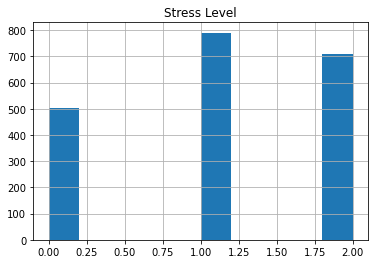

In [64]:
df.hist('Stress Level')

Mediante la grafica podemos determinar que se realiza una clasificación ya que los resultados salen muy alejados.

## Modelamiento

In [ ]:
# load the dataset
df = datasets.estres()

# print the names of the features
print("Features:\n", df.feature_names)

# print the label type of cancer
print("Labels:\n", df.target_names)

# print shape
print("Shape:\n", df.data.shape)

# print the top 5 records
print("Top five records:\n", df.data[0:5])

In [ ]:
# split dataset into 70% training and 30% test - select records randomly
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.3, random_state=109)

In [8]:
#Test

## Evaluación del Modelo

Construya un o dos párrafos con los principales hallazgos. Cómo está funcionando el modelo? Calidad en los resultados de predicción. 